In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
!pip install --upgrade jupyterlab-git
#jupyter lab build

  Using cached jupyterlab_git-0.30.1-py3-none-any.whl (478 kB)
  Using cached nbdime-3.1.0-py2.py3-none-any.whl (5.1 MB)
  Using cached jupyter_server-1.9.0-py3-none-any.whl (389 kB)
  Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
  Using cached jupyter_server_mathjax-0.2.3-py3-none-any.whl (3.1 MB)
  Using cached requests_unixsocket-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached argon2_cffi-20.1.0-cp38-cp38-win_amd64.whl (42 kB)
  Using cached websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
  Using cached ptyprocess-0.7.0-py2.py3-none-any.whl (13 kB)
  Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
  Using cached smmap-4.0.0-py2.py3-none-any.whl (24 kB)


In [56]:
def findOutlier(data1, data2, label):
        
    val_list = []
    aq_list = []
    fs_list = []
    
    overlap_count = 0
    
    Q1 = data1[label].quantile(0.25)
    Q3 = data1[label].quantile(0.75)
    IQR = Q3-Q1
    
    
    # Find outliers for AQUA data
    count = 0
    for val1 in data1[label]:
        #print(val)
        if((val1 < (Q1 - 1.5 * IQR)) | (val1 > (Q3 + 1.5 * IQR))):
            val_list.append(count)
            aq_list.append(count)
            # Print filename of outlier
            #print(data1[data1[label] == val1].index)
        count += 1
        
    Q1_2 = data2[label].quantile(0.25)
    Q3_2 = data2[label].quantile(0.75)
    IQR_2 = Q3_2-Q1_2
    
    # Find outliers for FS data
    count = 0
    for val2 in data2[label]:
        #print(val)
        if(((val2 < (Q1_2 - 1.5 * IQR_2)) | (val2 > (Q3_2 + 1.5 * IQR_2)))):
            val_list.append(count)
            fs_list.append(count)
            # Print filename of outlier
            #print(data2[data2[label] == val2].index)
        count += 1   
        
        
    for aq_val in aq_list:
        for fs_val in fs_list:
            if(aq_val == fs_val):
                overlap_count += 1
                
    print("----------------------------------------------------------------------------------------")
    print("%s : %d" %(label, len(val_list)))
    #print("%s : %d = %s" %(label, len(val_list), val_list))
    print("aq = %d | fs = %d | overlap = %d" %(len(aq_list), len(fs_list), overlap_count))
   
    '''
    print("-------------------------------------")
    print("aq_list : %d = %s" %(len(aq_list), aq_list))
    print("-------------------------------------")
    print("fs_list : %d = %s" %(len(fs_list), fs_list))
    '''
    return val_list
        
    
def printBoxPlot(group, data_aq, data_fs):

    for idx in data_aq:
        #print(idx)
        if(idx == 'Filename' or idx =='Group'):
            continue
            
        # combined data    
        data = [data_aq[idx], data_fs[idx]]
        
        max_aq = data_aq[idx].max()
        min_aq = data_aq[idx].min()
       
        max_fs = data_fs[idx].max()
        min_fs = data_fs[idx].min()
       
    
        # parameters for boxplot
        labels = ['AQUA','FREESURFER']
        outlier = dict(markerfacecolor='r', marker='o', c='r')
        
        # Find outlier indexs for each label and store it in list
        idx_list = findOutlier(data_aq, data_fs, idx)
        
        # subplot the histogram and boxplot 
        fig, (ax_hist_aq, ax_box, ax_hist_fs) = plt.subplots(1,3, sharey=True, 
                                    gridspec_kw={"width_ratios": (.15, .70, .15)}, figsize=(10,5))
    
        
        # 1 to 1 matching of AQ and FS outliers
        for pt in idx_list:
            x1 = data_aq[idx].iloc[pt]
            y1 = data_fs[idx].iloc[pt]
            ax_box.plot([1,2],[x1,y1], marker='o', c='b')
        
        
        # Plot box plot and histograms
        ax_box.boxplot(data, vert=True, labels=labels, flierprops=outlier, whis=1.5)
        
        # NEED TO FIND ACCURATE NUMBER OF BINS FOR HISTOGRAM (FREEDMAN DIACONIS RULE?????)
        ax_hist_aq.hist(data_aq[idx], color='g', orientation='horizontal', bins=25)
        ax_hist_aq.set_xlim(ax_hist_aq.get_xlim()[::-1])
        ax_hist_fs.hist(data_fs[idx], color='b', orientation='horizontal', bins=25)
        
        ax_box.set_title("%s (%s) boxplot" %(idx, group))
        ax_box.set_xlabel('Software')
        ax_hist_aq.set_ylabel('Volume (cm^3)')

        plt.show()
        
        
        #res = stats.ttest_ind(data_aq[idx], data_fs[idx], equal_var=True)
        #print(res)
        
        


---------------CN------------------
----------------------------------------------------------------------------------------
left_cerebral_white_matter : 0
aq = 0 | fs = 0 | overlap = 0


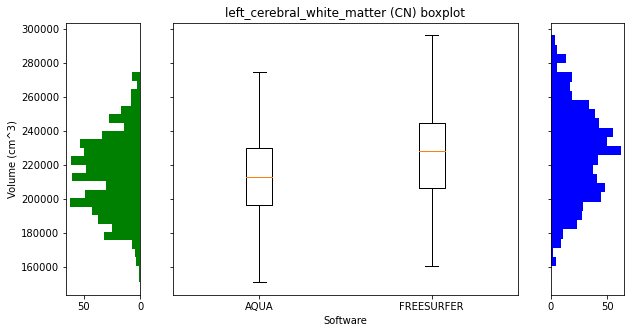

----------------------------------------------------------------------------------------
left_lateral_ventricle : 87
aq = 41 | fs = 46 | overlap = 41


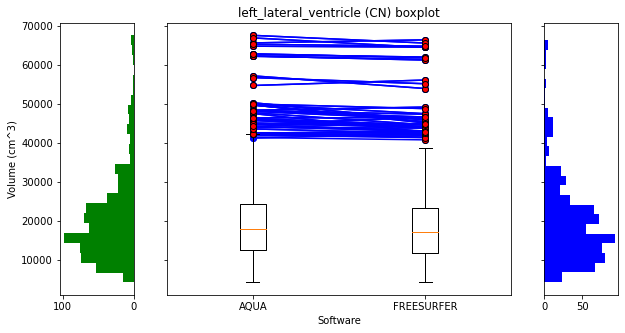

----------------------------------------------------------------------------------------
left_cerebellum_white_matter : 31
aq = 15 | fs = 16 | overlap = 6


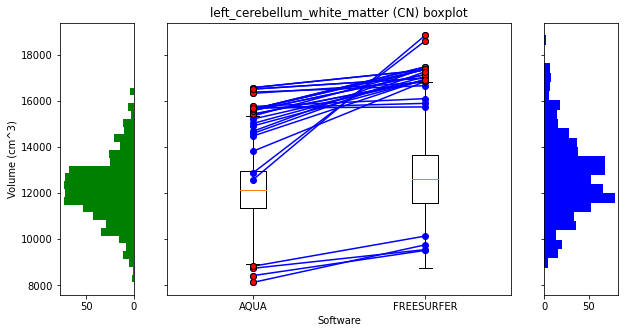

----------------------------------------------------------------------------------------
left_cerebellum_cortex : 14
aq = 12 | fs = 2 | overlap = 2


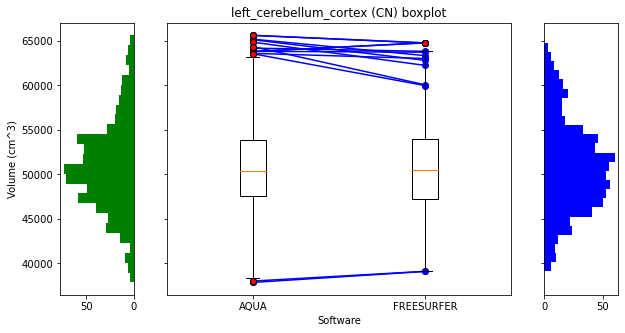

----------------------------------------------------------------------------------------
left_thalamus_proper : 3
aq = 1 | fs = 2 | overlap = 0


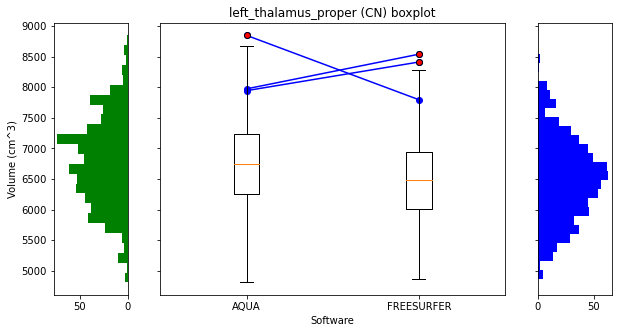

----------------------------------------------------------------------------------------
left_caudate : 19
aq = 11 | fs = 8 | overlap = 3


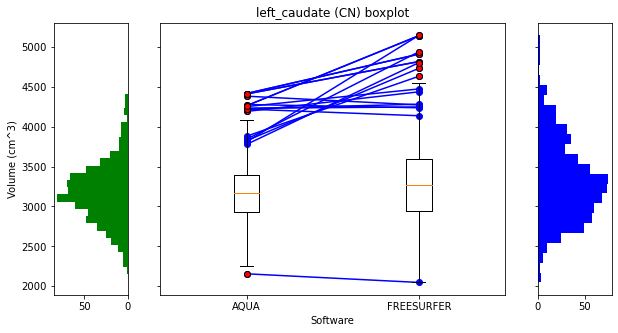

----------------------------------------------------------------------------------------
left_putamen : 30
aq = 13 | fs = 17 | overlap = 11


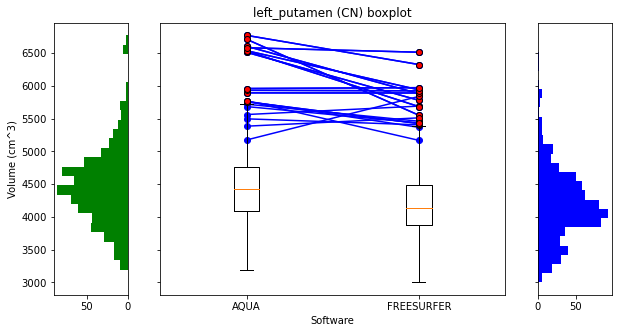

----------------------------------------------------------------------------------------
left_pallidum : 27
aq = 14 | fs = 13 | overlap = 7


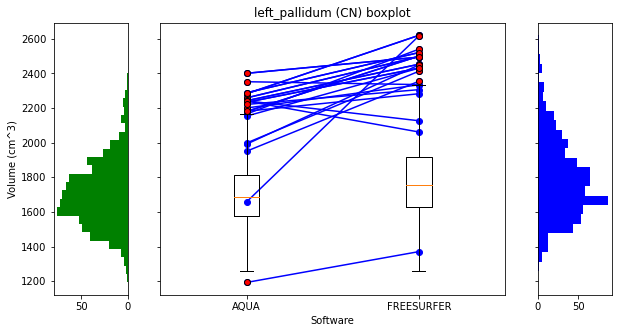

----------------------------------------------------------------------------------------
3rd_ventricle : 9
aq = 3 | fs = 6 | overlap = 3


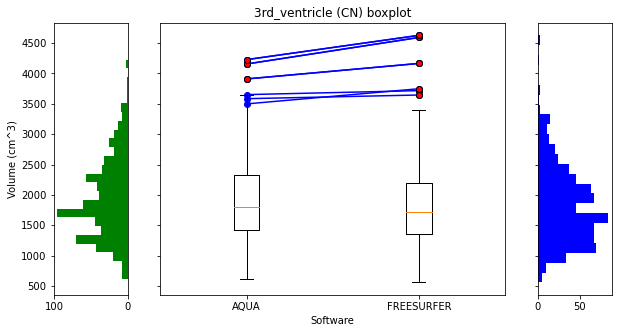

----------------------------------------------------------------------------------------
4th_ventricle : 80
aq = 36 | fs = 44 | overlap = 33


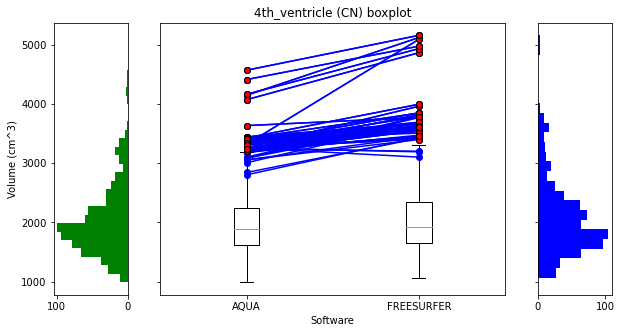

----------------------------------------------------------------------------------------
left_hippocampus : 10
aq = 5 | fs = 5 | overlap = 5


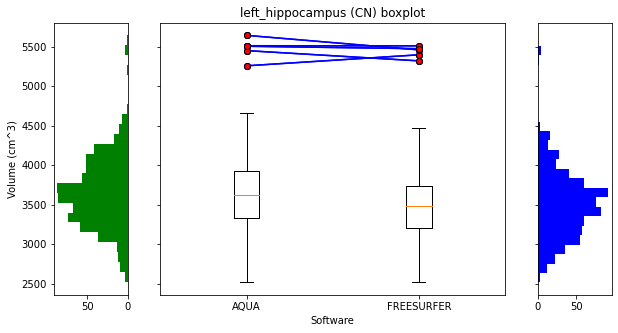

----------------------------------------------------------------------------------------
left_amygdala : 20
aq = 11 | fs = 9 | overlap = 7


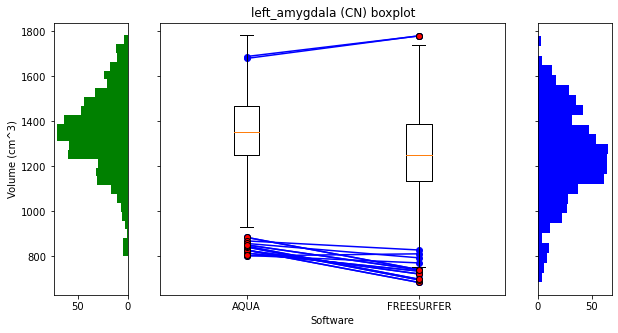

----------------------------------------------------------------------------------------
left_accumbens_area : 20
aq = 10 | fs = 10 | overlap = 3


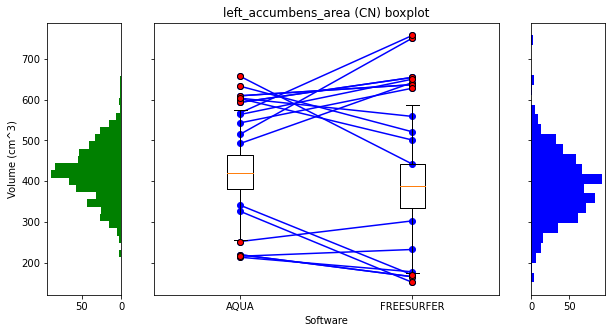

----------------------------------------------------------------------------------------
left_ventraldc : 2
aq = 2 | fs = 0 | overlap = 0


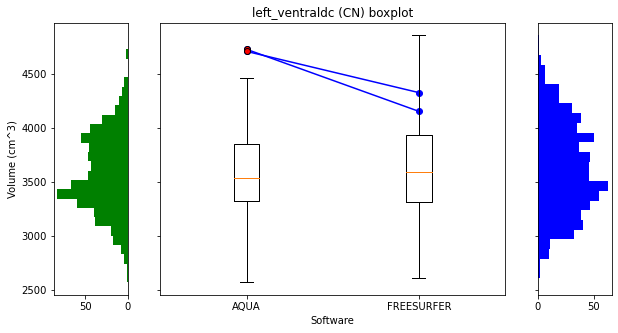

----------------------------------------------------------------------------------------
right_cerebral_white_matter : 0
aq = 0 | fs = 0 | overlap = 0


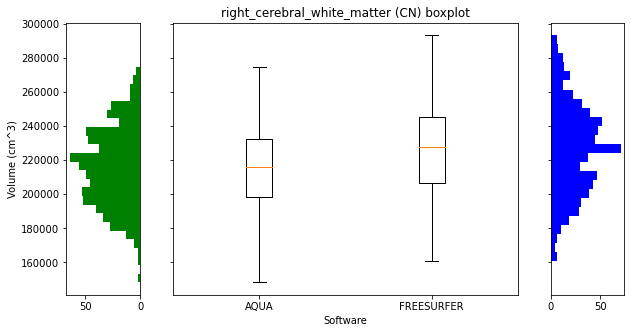

----------------------------------------------------------------------------------------
right_lateral_ventricle : 70
aq = 35 | fs = 35 | overlap = 33


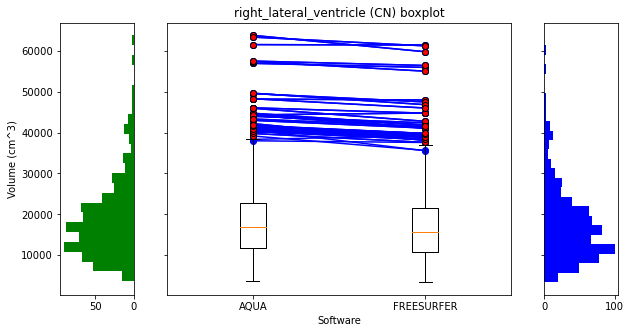

----------------------------------------------------------------------------------------
right_cerebellum_white_matter : 27
aq = 13 | fs = 14 | overlap = 5


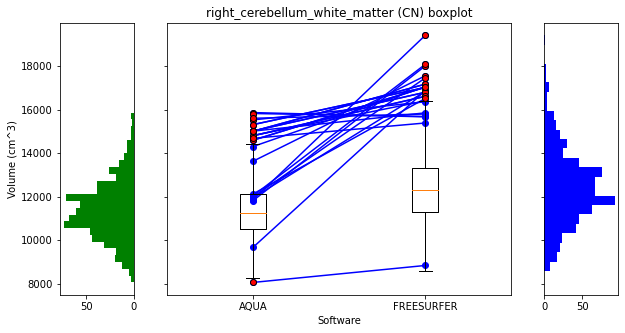

----------------------------------------------------------------------------------------
right_cerebellum_cortex : 17
aq = 15 | fs = 2 | overlap = 2


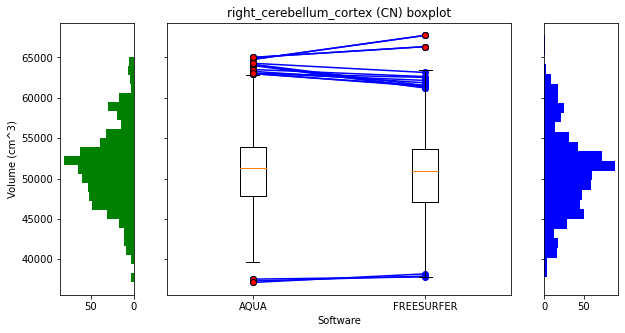

----------------------------------------------------------------------------------------
right_thalamus_proper : 0
aq = 0 | fs = 0 | overlap = 0


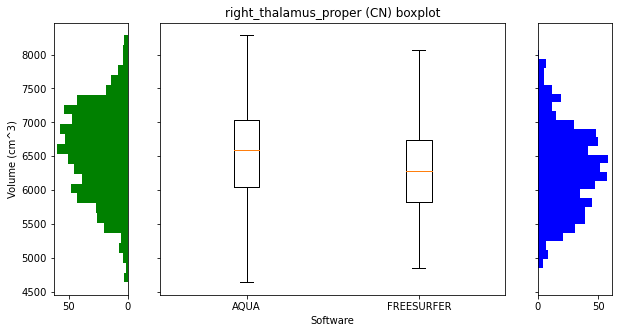

----------------------------------------------------------------------------------------
right_caudate : 14
aq = 8 | fs = 6 | overlap = 2


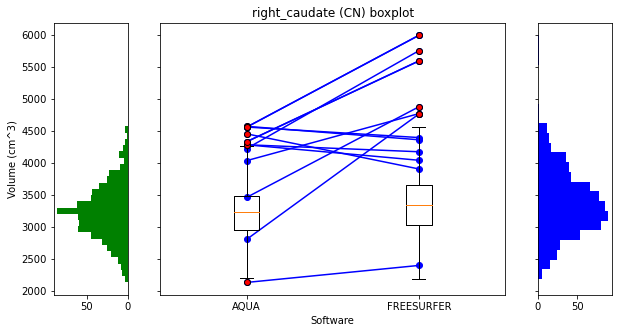

----------------------------------------------------------------------------------------
right_putamen : 21
aq = 6 | fs = 15 | overlap = 6


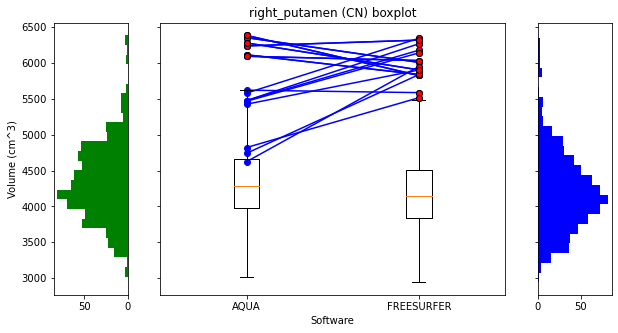

----------------------------------------------------------------------------------------
right_pallidum : 7
aq = 5 | fs = 2 | overlap = 1


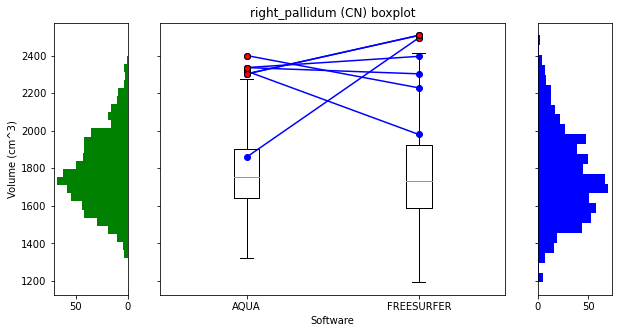

----------------------------------------------------------------------------------------
right_hippocampus : 18
aq = 8 | fs = 10 | overlap = 3


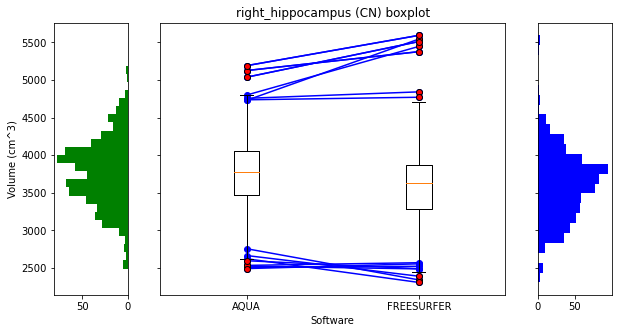

----------------------------------------------------------------------------------------
right_amygdala : 33
aq = 16 | fs = 17 | overlap = 11


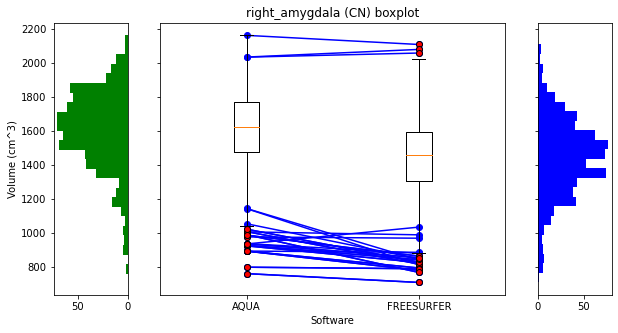

----------------------------------------------------------------------------------------
right_accumbens_area : 15
aq = 7 | fs = 8 | overlap = 2


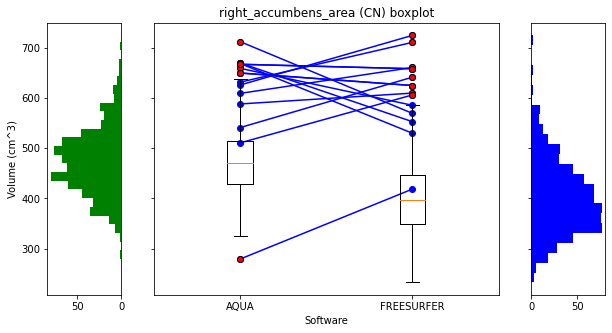

----------------------------------------------------------------------------------------
right_ventraldc : 2
aq = 1 | fs = 1 | overlap = 0


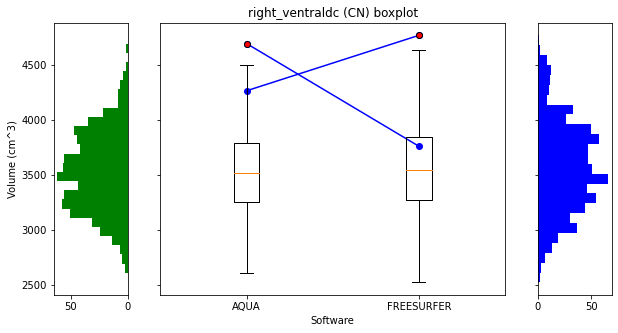

In [57]:
# import freesurfer and aqua and match index and combine
data_aq = pd.read_csv('aqua_volume_26_1yr_group.csv')
data_aq = data_aq.set_index('ID')
data_aq.index.name = 'Filename'

data_fs = pd.read_csv('freesurfer_volume_26_1yr_group.csv')
data_fs = data_fs.set_index('ID')
data_fs.index.name = 'Filename'

aq_CN = data_aq.loc[data_aq['Group'] == 'CN']
fs_CN = data_fs.loc[data_fs['Group'] == 'CN'] 

#print(fs_CN)

# match data metric of aqua to freesurfer
aq_CN = aq_CN * 1000

print("---------------CN------------------")
printBoxPlot('CN', aq_CN, fs_CN)

---------------MCI------------------
----------------------------------------------------------------------------------------
left_cerebral_white_matter : 0
aq = 0 | fs = 0 | overlap = 0


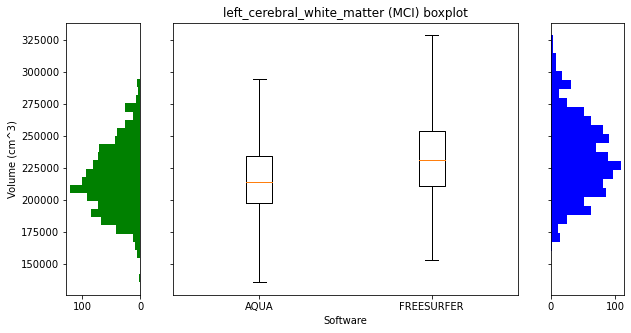

----------------------------------------------------------------------------------------
left_lateral_ventricle : 21
aq = 11 | fs = 10 | overlap = 8


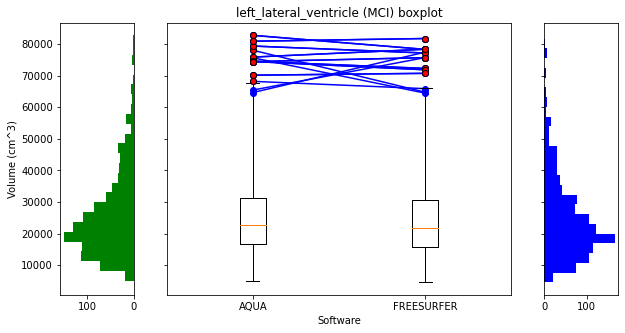

----------------------------------------------------------------------------------------
left_cerebellum_white_matter : 7
aq = 0 | fs = 7 | overlap = 0


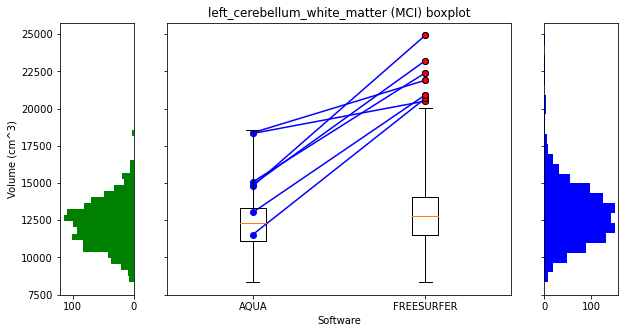

----------------------------------------------------------------------------------------
left_cerebellum_cortex : 0
aq = 0 | fs = 0 | overlap = 0


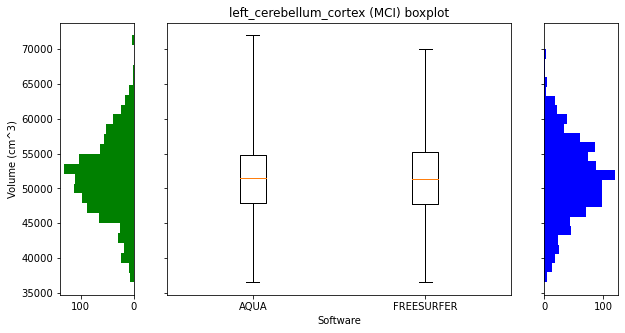

----------------------------------------------------------------------------------------
left_thalamus_proper : 1
aq = 0 | fs = 1 | overlap = 0


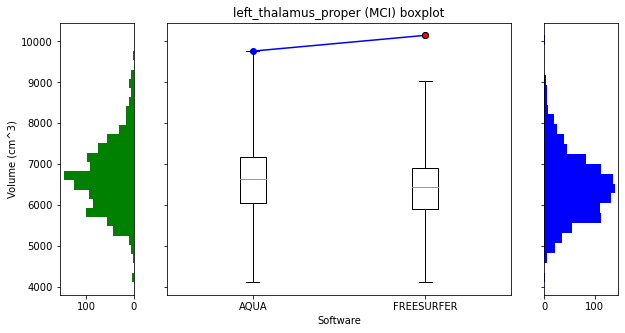

----------------------------------------------------------------------------------------
left_caudate : 21
aq = 4 | fs = 17 | overlap = 0


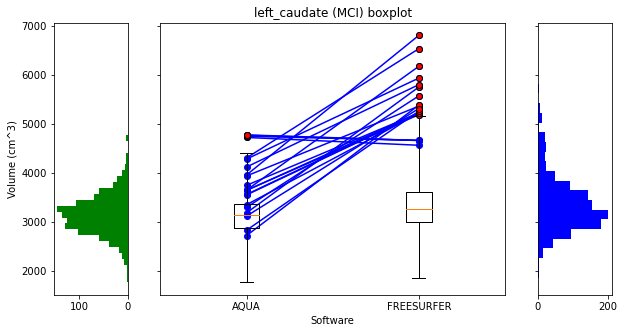

----------------------------------------------------------------------------------------
left_putamen : 8
aq = 4 | fs = 4 | overlap = 1


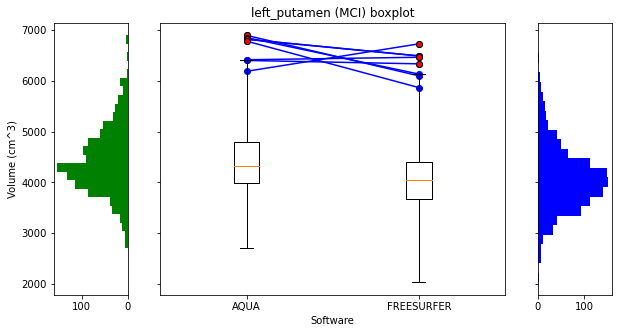

----------------------------------------------------------------------------------------
left_pallidum : 0
aq = 0 | fs = 0 | overlap = 0


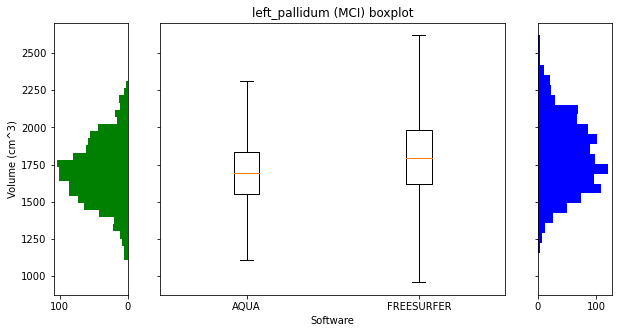

----------------------------------------------------------------------------------------
3rd_ventricle : 4
aq = 0 | fs = 4 | overlap = 0


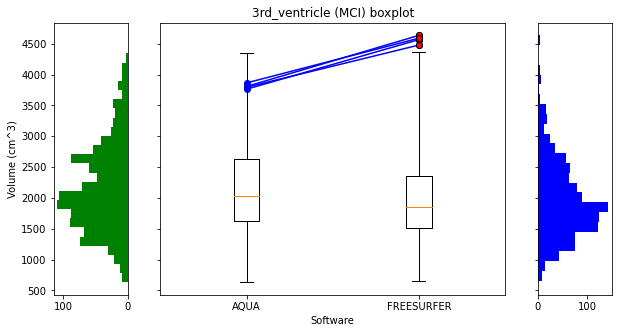

----------------------------------------------------------------------------------------
4th_ventricle : 0
aq = 0 | fs = 0 | overlap = 0


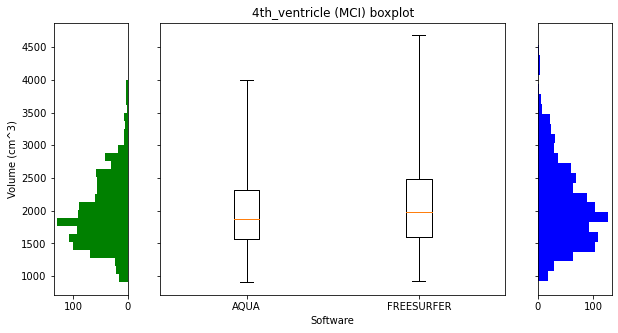

----------------------------------------------------------------------------------------
left_hippocampus : 0
aq = 0 | fs = 0 | overlap = 0


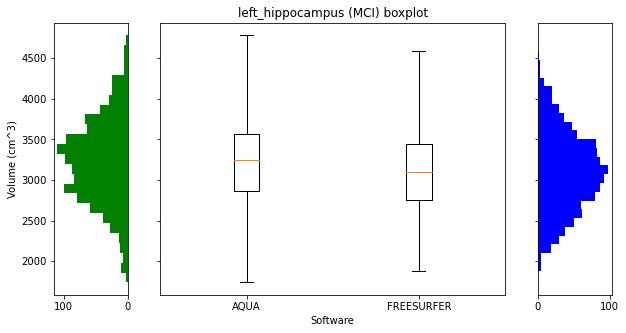

----------------------------------------------------------------------------------------
left_amygdala : 0
aq = 0 | fs = 0 | overlap = 0


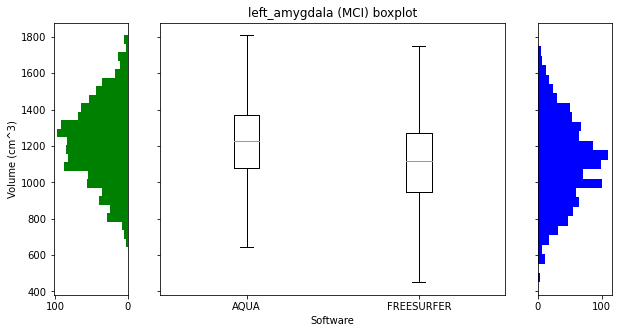

----------------------------------------------------------------------------------------
left_accumbens_area : 2
aq = 0 | fs = 2 | overlap = 0


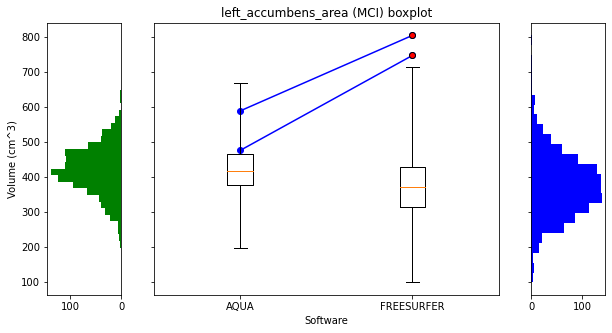

----------------------------------------------------------------------------------------
left_ventraldc : 1
aq = 0 | fs = 1 | overlap = 0


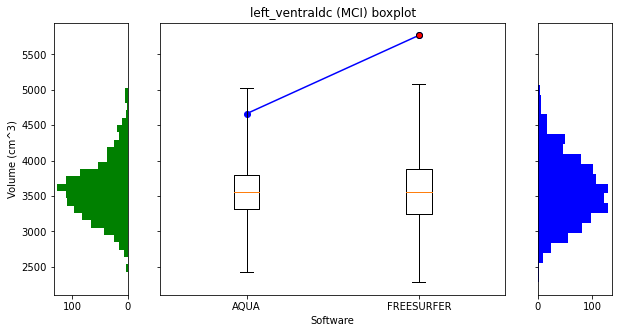

----------------------------------------------------------------------------------------
right_cerebral_white_matter : 0
aq = 0 | fs = 0 | overlap = 0


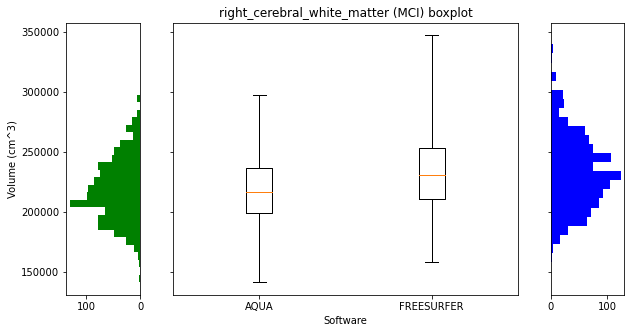

----------------------------------------------------------------------------------------
right_lateral_ventricle : 22
aq = 11 | fs = 11 | overlap = 11


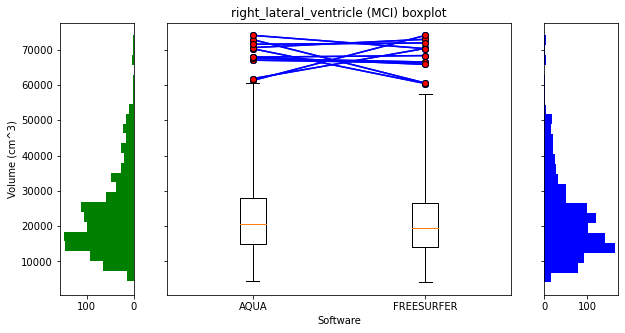

----------------------------------------------------------------------------------------
right_cerebellum_white_matter : 13
aq = 3 | fs = 10 | overlap = 3


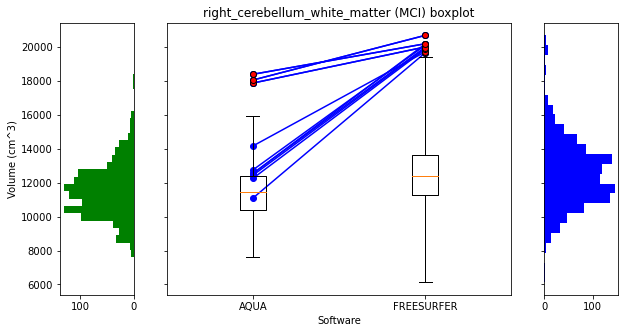

----------------------------------------------------------------------------------------
right_cerebellum_cortex : 0
aq = 0 | fs = 0 | overlap = 0


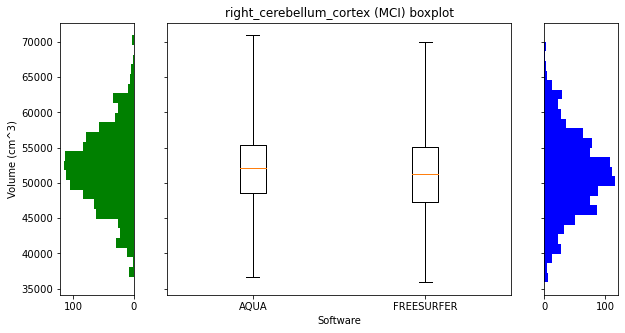

----------------------------------------------------------------------------------------
right_thalamus_proper : 1
aq = 0 | fs = 1 | overlap = 0


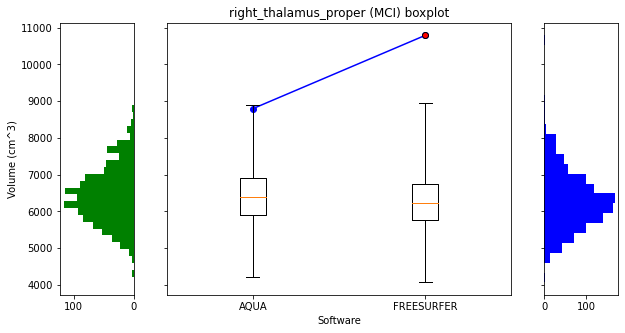

----------------------------------------------------------------------------------------
right_caudate : 15
aq = 0 | fs = 15 | overlap = 0


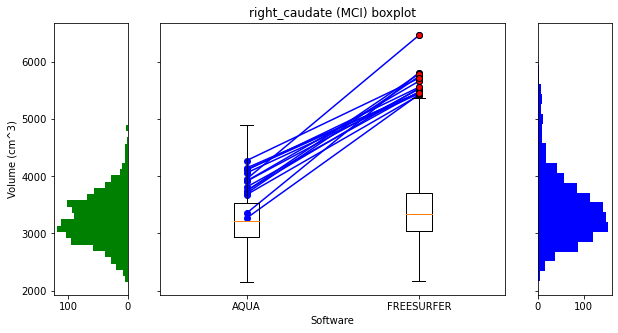

----------------------------------------------------------------------------------------
right_putamen : 8
aq = 1 | fs = 7 | overlap = 1


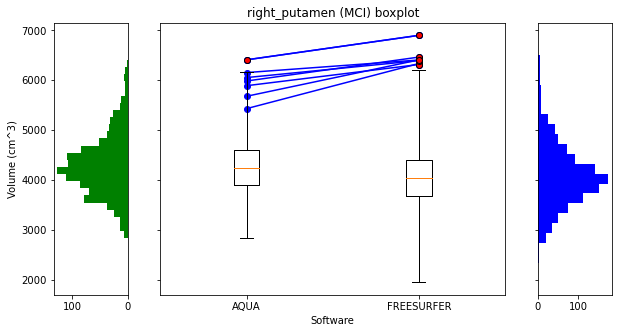

----------------------------------------------------------------------------------------
right_pallidum : 1
aq = 0 | fs = 1 | overlap = 0


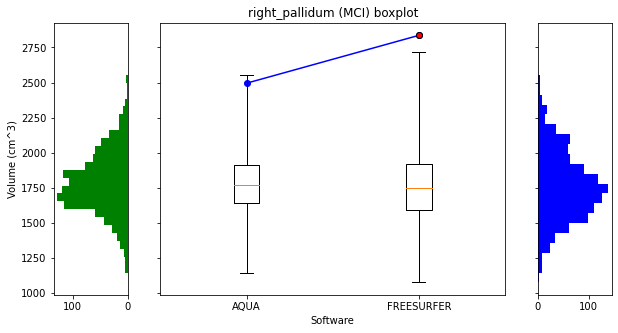

----------------------------------------------------------------------------------------
right_hippocampus : 0
aq = 0 | fs = 0 | overlap = 0


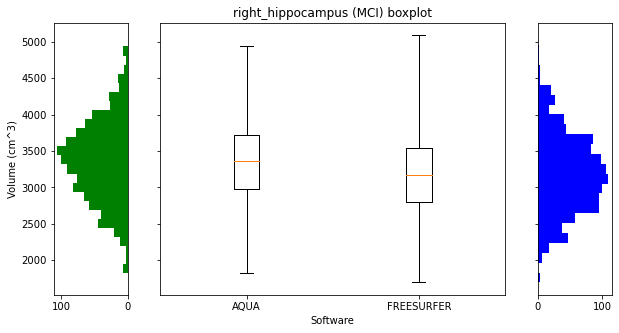

----------------------------------------------------------------------------------------
right_amygdala : 0
aq = 0 | fs = 0 | overlap = 0


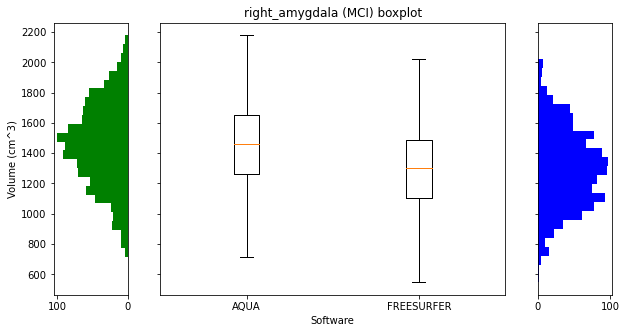

----------------------------------------------------------------------------------------
right_accumbens_area : 0
aq = 0 | fs = 0 | overlap = 0


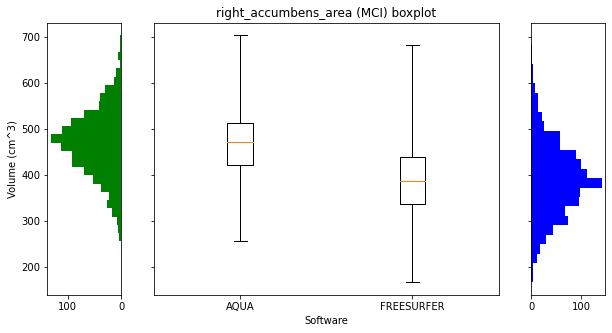

----------------------------------------------------------------------------------------
right_ventraldc : 3
aq = 2 | fs = 1 | overlap = 0


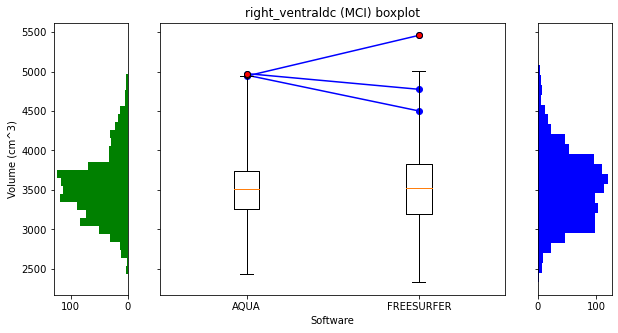

In [52]:
# import freesurfer and aqua and match index and combine
data_aq = pd.read_csv('aqua_volume_26_1yr_group.csv')
data_aq = data_aq.set_index('ID')
data_aq.index.name = 'Filename'

data_fs = pd.read_csv('freesurfer_volume_26_1yr_group.csv')
data_fs = data_fs.set_index('ID')
data_fs.index.name = 'Filename'

aq_CN = data_aq.loc[data_aq['Group'] == 'MCI']
fs_CN = data_fs.loc[data_fs['Group'] == 'MCI'] 

# match data metric of aqua to freesurfer
aq_CN = aq_CN * 1000



print("---------------MCI------------------")
printBoxPlot('MCI', aq_CN, fs_CN)

---------------AD------------------
----------------------------------------------------------------------------------------
left_cerebral_white_matter : 19
aq = 10 | fs = 9 | overlap = 4


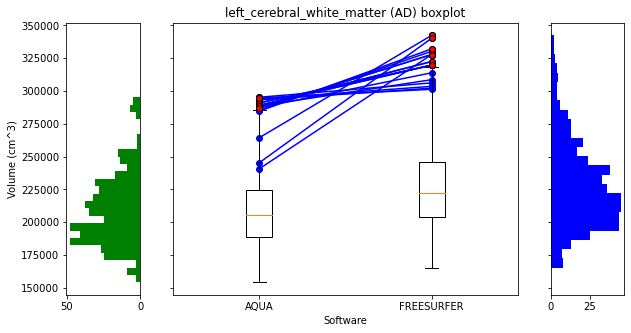

----------------------------------------------------------------------------------------
left_lateral_ventricle : 34
aq = 17 | fs = 17 | overlap = 17


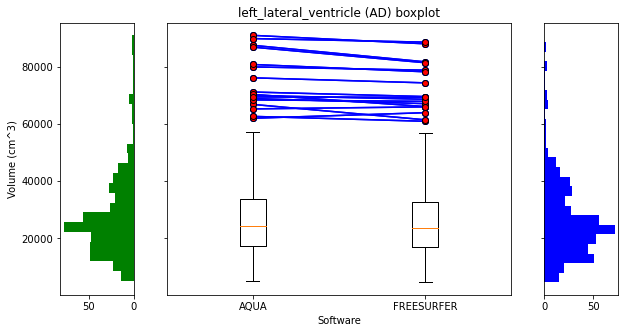

----------------------------------------------------------------------------------------
left_cerebellum_white_matter : 4
aq = 0 | fs = 4 | overlap = 0


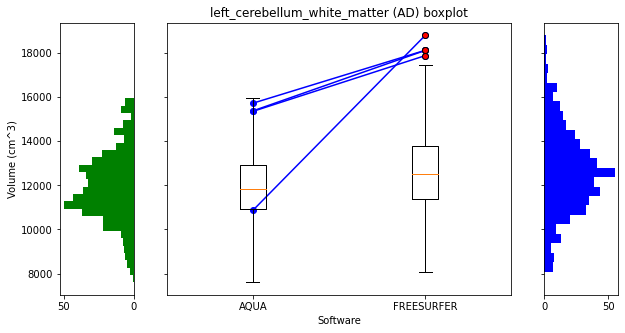

----------------------------------------------------------------------------------------
left_cerebellum_cortex : 0
aq = 0 | fs = 0 | overlap = 0


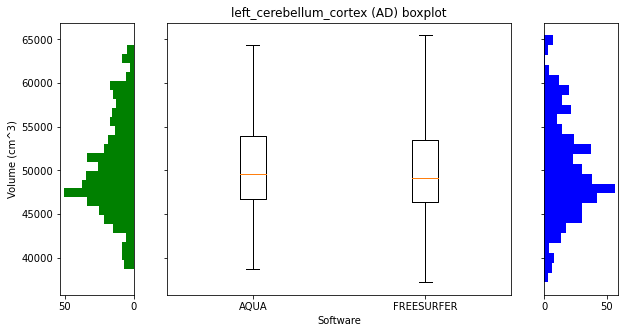

----------------------------------------------------------------------------------------
left_thalamus_proper : 5
aq = 0 | fs = 5 | overlap = 0


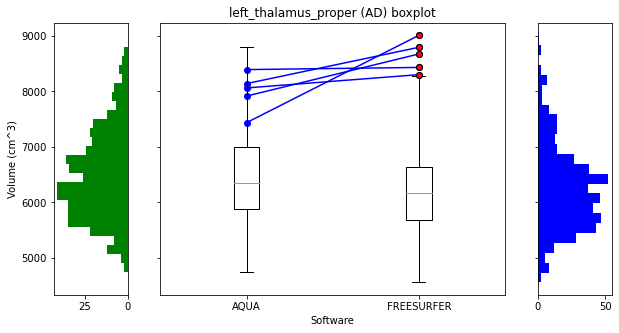

----------------------------------------------------------------------------------------
left_caudate : 18
aq = 4 | fs = 14 | overlap = 0


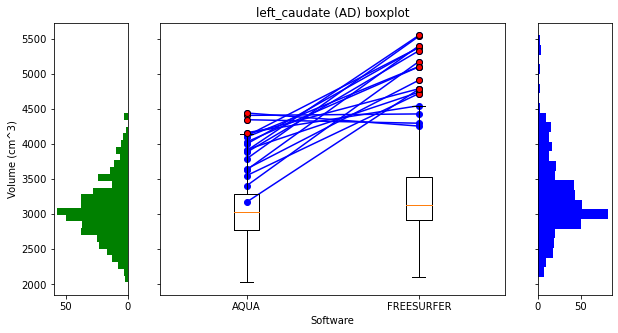

----------------------------------------------------------------------------------------
left_putamen : 16
aq = 1 | fs = 15 | overlap = 1


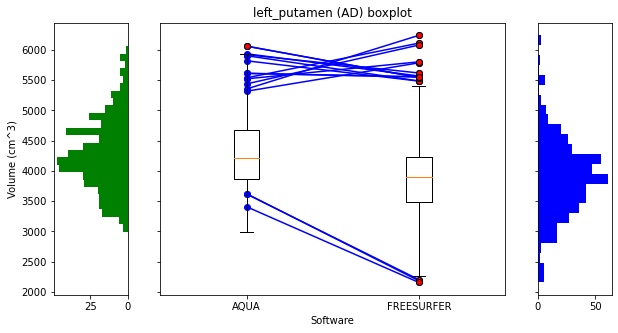

----------------------------------------------------------------------------------------
left_pallidum : 0
aq = 0 | fs = 0 | overlap = 0


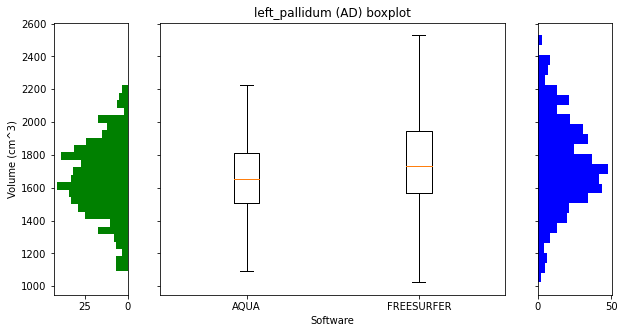

----------------------------------------------------------------------------------------
3rd_ventricle : 6
aq = 1 | fs = 5 | overlap = 0


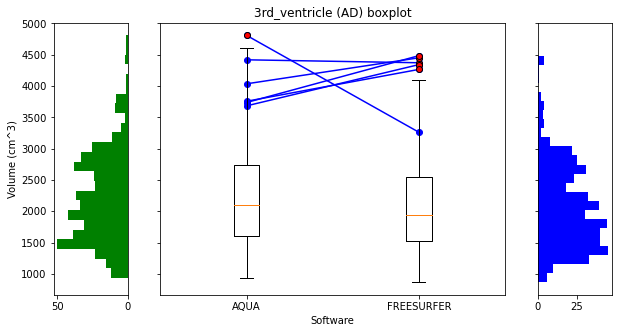

----------------------------------------------------------------------------------------
4th_ventricle : 9
aq = 2 | fs = 7 | overlap = 1


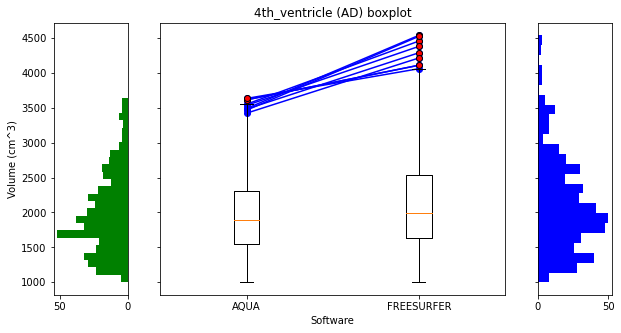

----------------------------------------------------------------------------------------
left_hippocampus : 15
aq = 11 | fs = 4 | overlap = 3


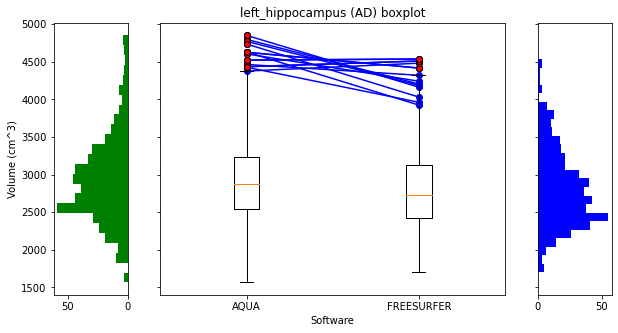

----------------------------------------------------------------------------------------
left_amygdala : 6
aq = 3 | fs = 3 | overlap = 2


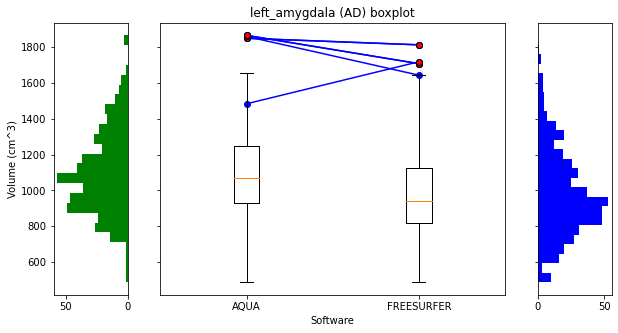

----------------------------------------------------------------------------------------
left_accumbens_area : 16
aq = 15 | fs = 1 | overlap = 0


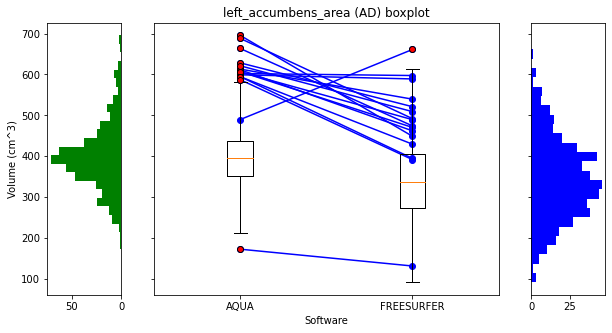

----------------------------------------------------------------------------------------
left_ventraldc : 6
aq = 5 | fs = 1 | overlap = 1


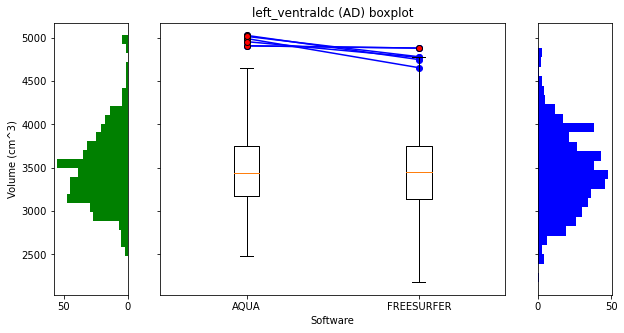

----------------------------------------------------------------------------------------
right_cerebral_white_matter : 16
aq = 9 | fs = 7 | overlap = 5


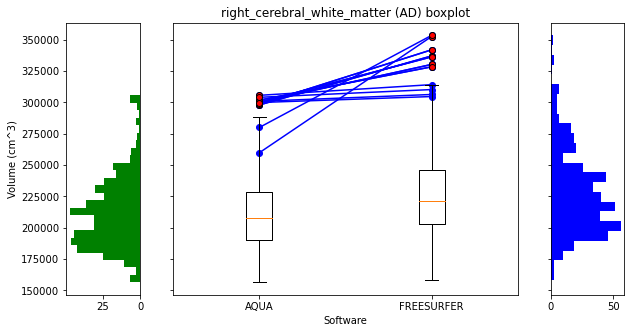

----------------------------------------------------------------------------------------
right_lateral_ventricle : 28
aq = 14 | fs = 14 | overlap = 14


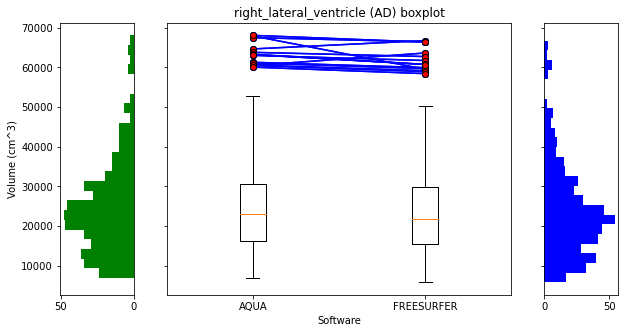

----------------------------------------------------------------------------------------
right_cerebellum_white_matter : 7
aq = 0 | fs = 7 | overlap = 0


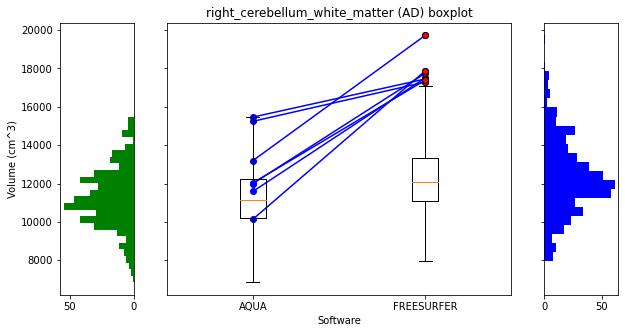

----------------------------------------------------------------------------------------
right_cerebellum_cortex : 4
aq = 3 | fs = 1 | overlap = 0


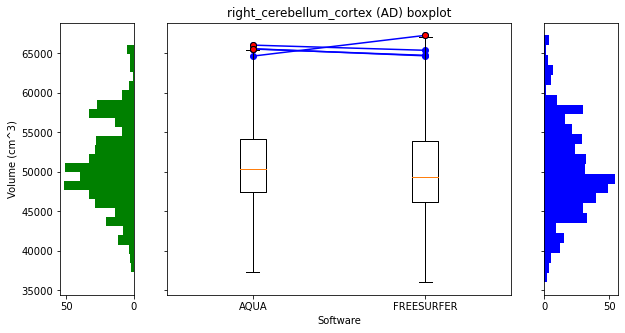

----------------------------------------------------------------------------------------
right_thalamus_proper : 0
aq = 0 | fs = 0 | overlap = 0


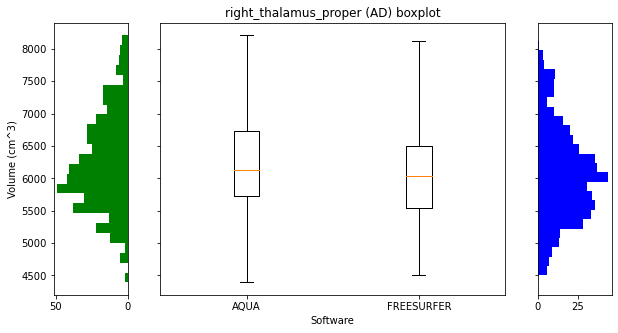

----------------------------------------------------------------------------------------
right_caudate : 16
aq = 4 | fs = 12 | overlap = 4


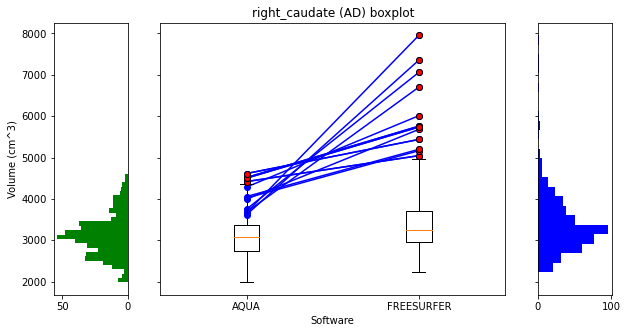

----------------------------------------------------------------------------------------
right_putamen : 13
aq = 2 | fs = 11 | overlap = 2


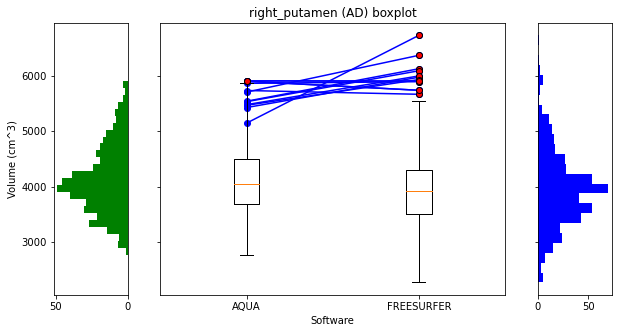

----------------------------------------------------------------------------------------
right_pallidum : 0
aq = 0 | fs = 0 | overlap = 0


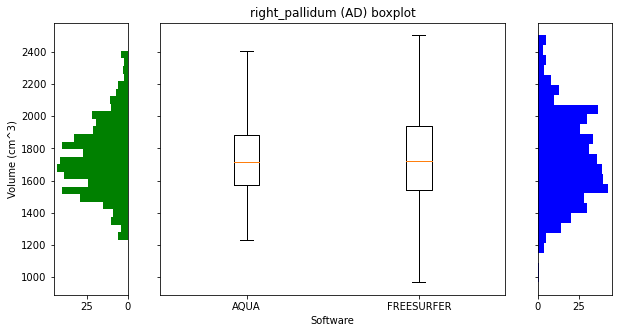

----------------------------------------------------------------------------------------
right_hippocampus : 5
aq = 0 | fs = 5 | overlap = 0


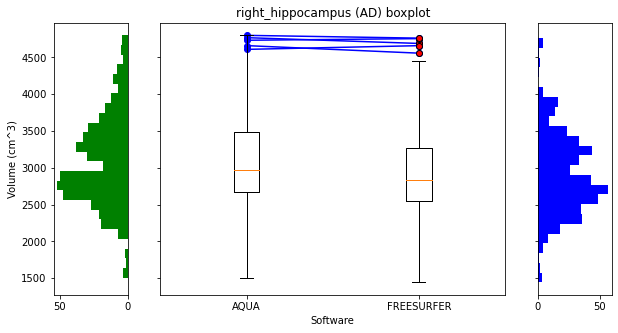

----------------------------------------------------------------------------------------
right_amygdala : 3
aq = 0 | fs = 3 | overlap = 0


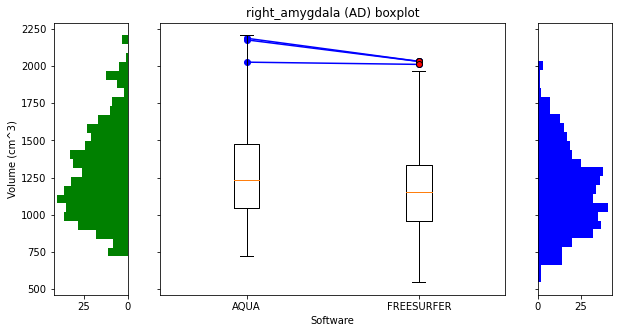

----------------------------------------------------------------------------------------
right_accumbens_area : 7
aq = 3 | fs = 4 | overlap = 0


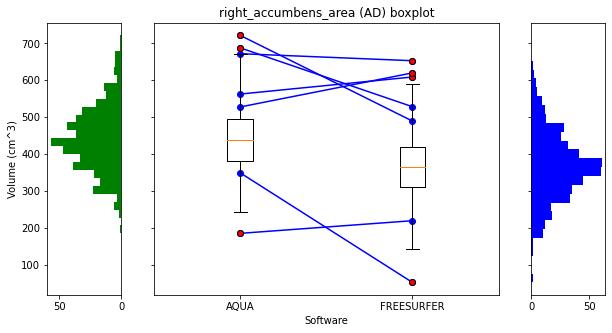

----------------------------------------------------------------------------------------
right_ventraldc : 13
aq = 6 | fs = 7 | overlap = 5


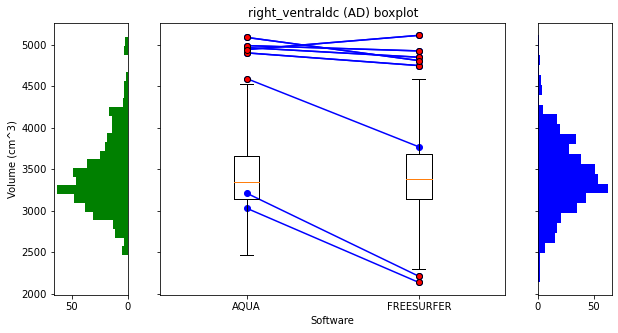

In [55]:
# import freesurfer and aqua and match index and combine
data_aq = pd.read_csv('aqua_volume_26_1yr_group.csv')
data_aq = data_aq.set_index('ID')
data_aq.index.name = 'Filename'

data_fs = pd.read_csv('freesurfer_volume_26_1yr_group.csv')
data_fs = data_fs.set_index('ID')
data_fs.index.name = 'Filename'

aq_CN = data_aq.loc[data_aq['Group'] == 'AD']
fs_CN = data_fs.loc[data_fs['Group'] == 'AD'] 

# match data metric of aqua to freesurfer
aq_CN = aq_CN * 1000



print("---------------AD------------------")
printBoxPlot('AD', aq_CN, fs_CN)